# Data Exploration: Mobile Device Usage and User Behavior Dataset

---

 **Kelompok Boki**
- Amaul Mursyidin Dzaki - 09011282328024 
- s


---

### Daftar Isi
- [Informasi Data](#informasi-data)
- [Permasalahan](#pertanyaan)
- x
- x
- x
- [Pembahasan Permasalahan]

## Permasalahan
---


### Pertanyaan
1. Jumlah masing-masing model device
2. Tipe smartphone yang banyak digunakan berdasarkan gender
3. Pengguna OS berdasar gender
4. Tingkat pemakaian dan status kecanduan berdasarkan gender
5. Model smartphone dengan kualitas dan durabilitas tertinggi
6. 


### Prediksi
1. Model smartphone yang memiliki kualitas tinggi
2. Prediksi profesi
3. Perkiraan pengangguran
4. Perlukah kampanye mengurangi penggunaan gadget?

## Persiapan Data

---

### Menginput Data

mempersiapkan keperluan sebelum melakukan langkah selanjutnya

In [41]:
#Import Library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [42]:
#Import dataset
user_behavior = pd.read_csv('user_behavior_dataset.csv')

In [43]:
#tampilin dataset
user_behavior

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3
...,...,...,...,...,...,...,...,...,...,...,...
695,696,iPhone 12,iOS,92,3.9,1082,26,381,22,Male,2
696,697,Xiaomi Mi 11,Android,316,6.8,1965,68,1201,59,Male,4
697,698,Google Pixel 5,Android,99,3.1,942,22,457,50,Female,2
698,699,Samsung Galaxy S21,Android,62,1.7,431,13,224,44,Male,1


Insight:  
penjelasan variabel yang dapat berguna:
- User ID - nomor identifikasi
- Device Model - Model device
- Operating System - Sistem Operasi device
- App Usage Time - Penggunaan aplikasi harian (Menit)
- Screen On Time - Rata-rata layar menyala per hari (Jam)
- Battery Drain - Pemakaian baterai per hari (mAh)
- Number of Apps Installed - Total aplikasi terinstall pada device
- Data Usage - penggunaan kuota data per hari (MB)
- Age - Umur user
- Gender - Jenis kelamin (hanya ada 2 untuk selamanya)
- User Behavior Class - klasifikasi kecanduan dari 1 (normal) hingga 5 (kecanduan berat)

Selanjutnya, saya melakukan pengecekan data dengan `info()` untuk mengetahui informasi lengkap serta mengecek data yang null jika ada.

In [44]:
user_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


gunakan `describe()` untuk menyajikan ringkasan statistik dari data numerik dalam suatu dataset untuk nampilin rata-rata, deviasi standar, nilai minimum, kuartil, dan nilai maksimum dari setiap kolom numerik dalam dataset.

In [45]:
user_behavior.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


gunakan `duplicated()` untuk mengecek apakah ada baris duplikat dalam DataFrame, lalu tampilkan totalnya. jika ada maka otomatis menghapusnya dengan `drop_duplicates()`

In [46]:
print(f"data duplicated: {user_behavior.duplicated().sum()}")
if user_behavior.duplicated().any():
    print("duplikasi dihapys.")
    user_behavior.drop_duplicates()

data duplicated: 0


Insight : Data bersih. bisa skip cleaning

### Data Cleaning
membersihkan data jika diprosesnya terdapat null

alhamdulilah clean, skip selanjutnya

## Memproses Data
---

#### Exploratory Data Analysis (EDA)

cari korelasi antar data numerik dengan `cor()`

In [47]:
print(user_behavior.select_dtypes(include=['float64', 'int64']).corr())

                             User ID  App Usage Time (min/day)  \
User ID                     1.000000                 -0.024957   
App Usage Time (min/day)   -0.024957                  1.000000   
Screen On Time (hours/day) -0.014287                  0.950333   
Battery Drain (mAh/day)    -0.019377                  0.956385   
Number of Apps Installed   -0.023914                  0.955253   
Data Usage (MB/day)        -0.014527                  0.942308   
Age                         0.045188                  0.004382   
User Behavior Class        -0.016242                  0.970498   

                            Screen On Time (hours/day)  \
User ID                                      -0.014287   
App Usage Time (min/day)                      0.950333   
Screen On Time (hours/day)                    1.000000   
Battery Drain (mAh/day)                       0.948983   
Number of Apps Installed                      0.946975   
Data Usage (MB/day)                           0.941322   

ambil sample random agar bisa melihat data tanpa melihat keseluruhan data.

In [48]:
user_behavior.sample(20)

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
46,47,OnePlus 9,Android,558,8.4,2447,97,1594,22,Female,5
299,300,Xiaomi Mi 11,Android,122,3.3,748,35,499,59,Female,2
400,401,Xiaomi Mi 11,Android,522,11.1,2821,86,1891,42,Male,5
229,230,Samsung Galaxy S21,Android,360,7.3,1946,79,1164,50,Male,4
573,574,Samsung Galaxy S21,Android,537,9.1,2858,86,2158,22,Male,5
29,30,Samsung Galaxy S21,Android,412,6.2,1899,78,1384,19,Female,4
672,673,Xiaomi Mi 11,Android,500,11.2,2925,84,2438,27,Male,5
185,186,Google Pixel 5,Android,498,10.7,2738,94,1995,42,Male,5
200,201,Samsung Galaxy S21,Android,495,8.9,2920,84,2252,31,Female,5
648,649,iPhone 12,iOS,389,6.3,2294,76,1334,53,Male,4


keseluruhan dengan `include=all`

In [49]:
user_behavior.describe(include='all')

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
count,700.00000,700,700,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700,700.000000
unique,NaN,5,2,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN
top,NaN,Xiaomi Mi 11,Android,NaN,NaN,NaN,NaN,NaN,NaN,Male,NaN
freq,NaN,146,554,NaN,NaN,NaN,NaN,NaN,NaN,364,NaN
mean,350.50000,NaN,NaN,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,NaN,2.990000
std,202.21688,NaN,NaN,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,NaN,1.401476
min,1.00000,NaN,NaN,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,NaN,1.000000
25%,175.75000,NaN,NaN,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,NaN,2.000000
50%,350.50000,NaN,NaN,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,NaN,3.000000
75%,525.25000,NaN,NaN,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,NaN,4.000000


#### Analysis Masalah

##### Pertanyaan

###### **Jumlah masing-masing model device**

gunaka `groupby()` untuk mengelompokan data berdasar kolom lalu gunakan `size()` untuk menghitung setiap model yang sama dan `reset_index(name='Jumlah')` Membuat DataFrame baru dengan kolom tambahan 'Jumlah' yang menyimpan hasil hitungan

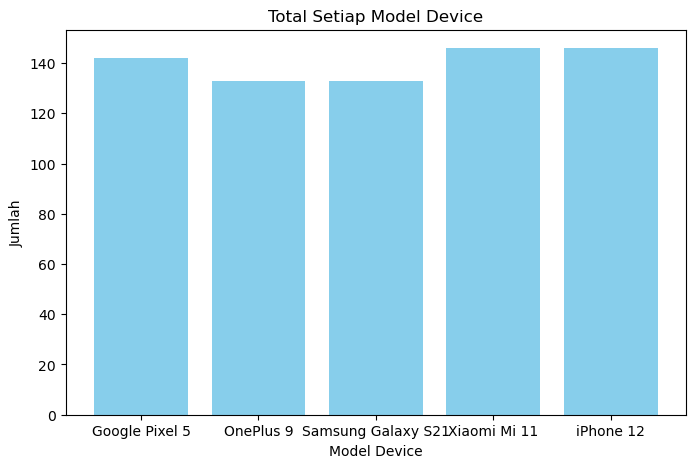

         Device Model  Jumlah
0      Google Pixel 5     142
1           OnePlus 9     133
2  Samsung Galaxy S21     133
3        Xiaomi Mi 11     146
4           iPhone 12     146


In [50]:



total_by_device = user_behavior.groupby('Device Model').size().reset_index(name='Jumlah')

# membuat bar chart
# figure untuk mengatur ukuran gambar (x, y)
plt.figure(figsize=(8, 5))
plt.bar(total_by_device['Device Model'], total_by_device['Jumlah'], color='skyblue')

# membuat chart
# x bagian horziontal (model) y bagian vertikal(Jumlah)
plt.xlabel('Model Device')
plt.ylabel('Jumlah')
plt.title('Total Setiap Model Device')

# tampilin chart
plt.show()

# tampilin total sbg plain text
print(total_by_device)


###### **Tipe smartphone yang banyak digunakan berdasarkan gender**

`total_model_by_gender = user_behavior.groupby(['Device Model', 'Gender']).size().unstack(fill_value=0)` mengelompokan data berdasar Device Model dan Gender, `fill_value=0` untuk antisipasi jika tidak ada user yang memakai model dan akan mengisi dengan 0 (karena biasanya NaN).

Gender              Female  Male
Device Model                    
Google Pixel 5          69    73
OnePlus 9               61    72
Samsung Galaxy S21      54    79
Xiaomi Mi 11            78    68
iPhone 12               74    72


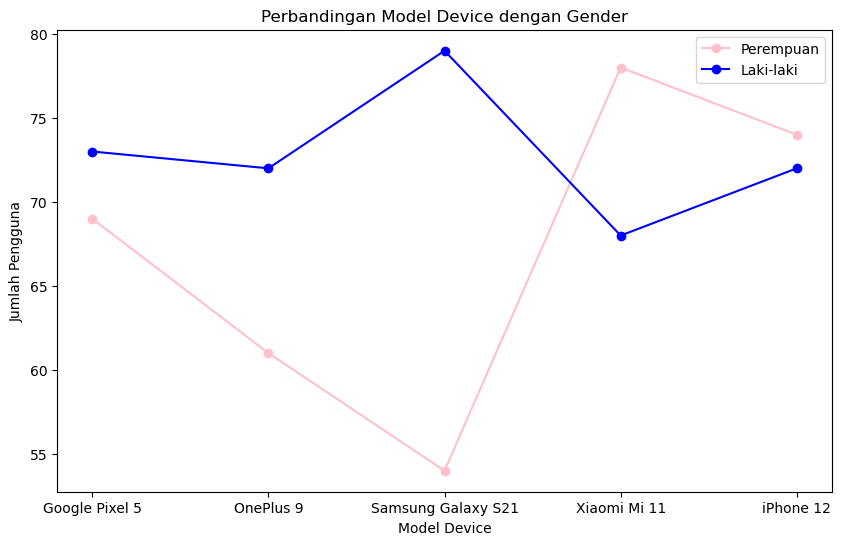

In [51]:
total_model_by_gender = user_behavior.groupby(['Device Model', 'Gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))

# Garis untuk perempuan
plt.plot(total_model_by_gender.index, total_model_by_gender['Female'], marker='o', label='Perempuan', color='pink')

# Garis untuk laki-laki
plt.plot(total_model_by_gender.index, total_model_by_gender['Male'], marker='o', label='Laki-laki', color='blue')

# Bikin label
plt.xlabel('Model Device')
plt.ylabel('Jumlah Pengguna')
plt.title('Perbandingan Model Device dengan Gender')
plt.legend()

# tampilkan secara plain text
print(total_model_by_gender)

**Prediksi**

###### **Pengguna OS berdasar gender**

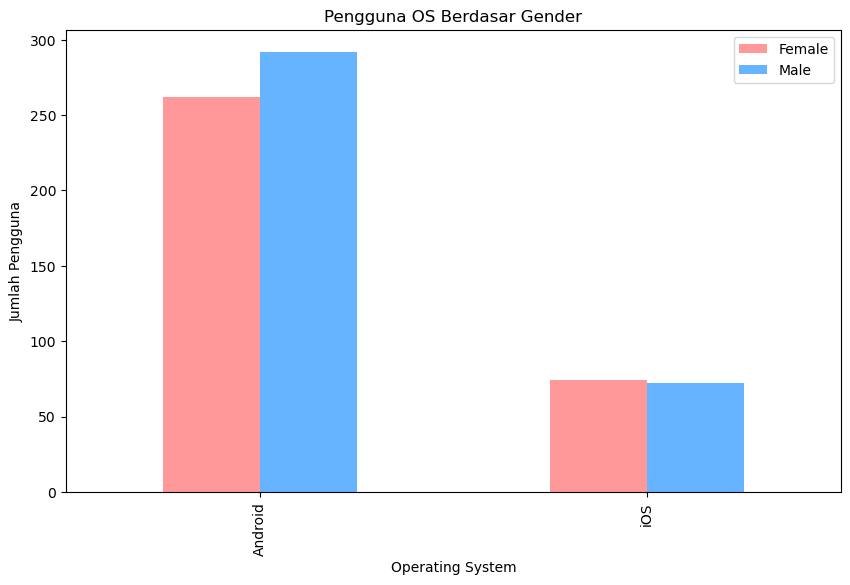

Gender            Female  Male
Operating System              
Android              262   292
iOS                   74    72


In [52]:
# kelompokan data lalu hitung
total_os_by_gender = user_behavior.groupby(['Operating System', 'Gender']).size().unstack(fill_value=0)

# visualisasikaan pakai bar chart
# warna pertama untuk "Female" kedua "Male"
total_os_by_gender.plot(kind='bar', stacked=False, figsize=(10, 6), color=['#ff9999','#66b3ff'])

# Tambahkan label dan judul
plt.xlabel('Operating System')
plt.ylabel('Jumlah Pengguna')
plt.title('Pengguna OS Berdasar Gender')
plt.legend()

# tampilkan
plt.show()

# tampilkan plain textnya
print(total_model_by_os)

###### **Tingkat Kecanduan Berdasarkan Umur**

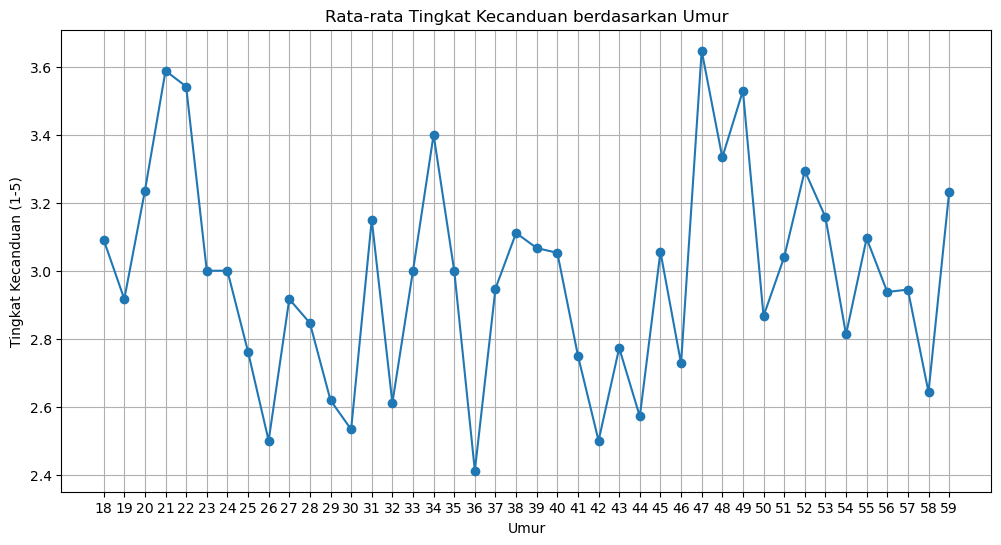

In [73]:
kecanduan_by_umur = user_behavior.groupby('Age')['User Behavior Class'].mean().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(kecanduan_by_umur['Age'], kecanduan_by_umur['User Behavior Class'], marker='o')
plt.title('Rata-rata Tingkat Kecanduan berdasarkan Umur')
plt.xlabel('Umur')
plt.ylabel('Tingkat Kecanduan (1-5)')
plt.xticks(range(min(user_behavior['Age']), max(user_behavior['Age']) + 1))  # Menyesuaikan ticks x
plt.grid(True)
plt.show()

##### Prediksi

###### **Model smartphone yang memiliki kualitas tinggi**

saya membandingkan data yaitu *Screen On Time*, *App Usage Time*, dan *Numbers of Apps Installed* lalu dikurangi *Battery Drain* yang memiliki peran dalam menjadi perbandingan untuk memperkirakan model device yang berkualitas tinggi

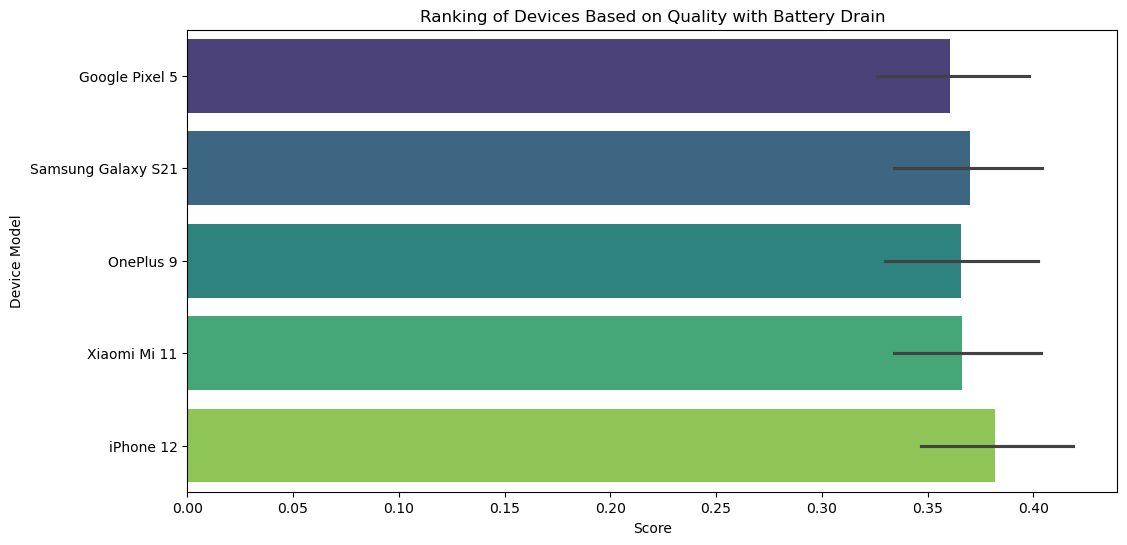

In [72]:
weights = {
    'screen_on_time': 0.4,
    'number_of_apps_installed': 0.3,
    'app_usage_time': 0.2,
    'battery_drain': -0.1  # Bobot negatif untuk Battery Drain
}

# Normalisasi nilai untuk setiap parameter
user_behavior['screen_on_time_norm'] = user_behavior['Screen On Time (hours/day)'] / user_behavior['Screen On Time (hours/day)'].max()
user_behavior['number_of_apps_installed_norm'] = user_behavior['Number of Apps Installed'] / user_behavior['Number of Apps Installed'].max()
user_behavior['app_usage_time_norm'] = user_behavior['App Usage Time (min/day)'] / user_behavior['App Usage Time (min/day)'].max()
user_behavior['battery_drain_norm'] = user_behavior['Battery Drain (mAh/day)'] / user_behavior['Battery Drain (mAh/day)'].max()

# Menghitung skor total
user_behavior['score'] = (
    weights['screen_on_time'] * user_behavior['screen_on_time_norm'] +
    weights['number_of_apps_installed'] * user_behavior['number_of_apps_installed_norm'] +
    weights['app_usage_time'] * user_behavior['app_usage_time_norm'] +
    weights['battery_drain'] * user_behavior['battery_drain_norm']
)

ranked_devices = user_behavior.sort_values(by='score', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='score', y='Device Model', data=ranked_devices, palette='viridis', hue='Device Model', legend=False)
plt.title('Ranking of Devices Based on Quality with Battery Drain')
plt.xlabel('Score')
plt.ylabel('Device Model')
plt.show()